In [1]:
import numpy as np
import math
import pandas as pd
# input material properties

# calcualte alpha

# calcualte teh melt pool depth

# return pi1, pi2 

# heat of fusion for alu is 10.79 kJ/mol ???
# or 4*10^5 J/kg

# t0 will be 300K
# t_solid will be 580 + 273 K = 853 K

# rho = 2700 kg/m^3

# Cp = 0.915 kJ/kgK

# diffusivity = 9.7 * 10^-5 m^2/s

# lets take the absorptivity as 0.3 the same as in the paper
# assume that lasre power is at least 100W set the absorbptivity to 0.4 accoridn to the material paper


# we have: 
# maybe absorptivity, power, rho, cp, T_solid, T_0, hf, Diffusivity, scan_speed, beam_diameter

# ask abou the beam diameter, absorptivity

# we dont have:
# 


def H_star(absorptivity=0.3, power=400.0, rho=2500.0, Cp=915.0, T_solid=853.0, T_0=300.0, hf=40000.0, Diffusivity=0.000097, scan_speed=0.5, beam_diameter=0.0001):

    H = (4 * absorptivity * power)/(np.pi*rho*(Cp*(T_solid - T_0) + hf) * np.sqrt(Diffusivity * scan_speed * beam_diameter**3))

    #write the values for the variables in a csv file 
        

    return H

test_1 = H_star()

print(test_1)



# write a loop to go through power bewtween 50 and 400W, scan speed between 0.750 and 3.0

#H * fourier number * absorptivity

df = pd.DataFrame(columns=['Power', 'Scan Speed', 'H_star'])

for power in np.linspace(50, 400, 20):
    for scan_speed in np.linspace(0.1, 3.0, 20):
        H_star_val = H_star(power=power, scan_speed=scan_speed)*100*0.9*0.3
        df = df._append({'Power': power, 'Scan Speed': scan_speed, 'H_star': H_star_val}, ignore_index=True)

print(df)

# write all the values for the variables in a csv file
df.to_csv('H_star_values.csv')




16.072810378421977
     Power  Scan Speed      H_star
0     50.0    0.100000  121.297151
1     50.0    0.252632   76.314451
2     50.0    0.405263   60.253467
3     50.0    0.557895   51.354023
4     50.0    0.710526   45.505146
..     ...         ...         ...
395  400.0    2.389474  198.513233
396  400.0    2.542105  192.461481
397  400.0    2.694737  186.931464
398  400.0    2.847368  181.852282
399  400.0    3.000000  177.165829

[400 rows x 3 columns]


/tmp/ipykernel_12165/1301315206.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({'Power': power, 'Scan Speed': scan_speed, 'H_star': H_star_val}, ignore_index=True)


In [2]:
df.head()

,Power,Scan Speed,H_star
0,50.0,0.100000,121.297151
1,50.0,0.252632,76.314451
2,50.0,0.405263,60.253467
3,50.0,0.557895,51.354023
4,50.0,0.710526,45.505146


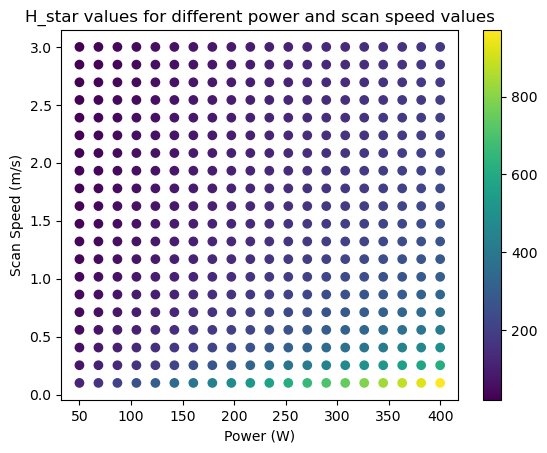

In [3]:
# plot the data
#use the H_star values as the color map

import matplotlib.pyplot as plt

plt.scatter(df['Power'], df['Scan Speed'], c=df['H_star'])
plt.colorbar()
plt.xlabel('Power (W)')
plt.ylabel('Scan Speed (m/s)')
plt.title('H_star values for different power and scan speed values')

        

plt.show()

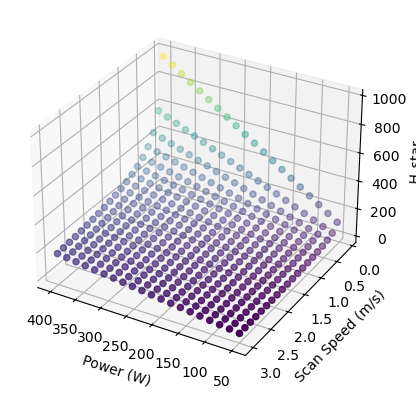

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Power'], df['Scan Speed'], df['H_star'], c=df['H_star'])
ax.set_xlabel('Power (W)')
ax.set_ylabel('Scan Speed (m/s)')
ax.set_zlabel('H_star')
ax.view_init(30, 120)
plt.show()




In [5]:
# fourier number for our aluminum
def Fourier(alpha=0.0000097, t=0.001, L=0.001):
    return alpha*t/L**2


SF = np.sqrt(Fourier())

print(SF)

0.09848857801796106


In [6]:
# def D_Depth(H):
#     a = 0.0152
#     b = -0.117
#     c = 1.215
#     # quadratic equation from the enthalpy paper
#     D = a*H**2 + b*H + c
#     return D


# def D_Width(H):
#     a = 0.00053
#     b = 0.158
#     c = 0.207
#     # quadratic equation from the enthalpy paper
#     W = a*H**2 + b*H + c
#     return W


In [7]:
# def Melt_mode(H):
#     Melt_mode = D_Depth(H) / D_Width(H)
#     #print(D_Depth(H), D_Width(H), Melt_mode)
#     if Melt_mode > 1:
#         #print("possible keyholes")
#         MM = 1
#     else:
#         #print("no keyholes")
#         MM = 0
#     return MM

In [8]:
# for i in range(50):
#     print(f"i={i}")
#     print(Melt_mode(i))


In [9]:
# read_depth = 0.00001*D_Depth(18)
# print(read_depth)

In [10]:
# H * 10 to get melt pool in micro meters


In [11]:
# reward function
H = H_star()
Scan_speed = 0.5
reward = (-0.01*(H - 150)**2) - 100*((scan_speed - 3)**4)
print(reward)

-179.36492119934113


In [12]:
# q learning, table based

# state space: power, scan speed

# action space: power up, power down, power same, scan speed up, scan speed down, scan speed same
# if power same, scan speed same, reward = -1000

# reward function = -0.01*(H_star(power=i, scan_speed=j) - 150)**2 - 100*((scan_speed - 3)**4)

#power range 50 to 400 by 25. Minum value of 50, max value of 400


#  scan speed range 0.1 to 3.0 by 0.1. Minum value of 0.1, max value of 3.0

# explore the state space and action space

# start with a random state, random action

# update the q table

# repeat the process

# until the q table converges

# use the q table to find the optimal power and scan speed values

# plot the optimal power and scan speed values

# plot the H_star values for the optimal power and scan speed values

In [13]:
# q learning, table based

# state space: power, scan speed

# action space: power up, power down, power same, scan speed up, scan speed down, scan speed same

# reward function = -0.01*(H_star(power=i, scan_speed=j) - 150)**2 - 100*((scan_speed - 3)**4)

# power range 50 to 400 by 25. Minum value of 50, max value of 400

# scan speed range 0.1 to 3.0 by 0.1. Minum value of 0.1, max value of 3.0

# explore the state space and action space

# start with a random state, random action

# update the q table

# repeat the process

# until the q table converges

# use the q table to find the optimal power and scan speed values

# plot the optimal power and scan speed values

# plot the H_star values for the optimal power and scan speed values

# intruduce a chance to pick a random action instead of the optimal action

# max epochs = 1000

def reward_function(absorptivity=0.3, power=400.0, rho=2500.0, Cp=915.0, T_solid=853.0, T_0=300.0, hf=40000.0, Diffusivity=0.000097, scan_speed=0.5, beam_diameter=0.0001):
    H = (4 * absorptivity * power)/(np.pi*rho*(Cp*(T_solid - T_0) + hf) * np.sqrt(Diffusivity * scan_speed * beam_diameter**3))*100*0.9*0.3
    return H

def reward(self, power, scan_speed):
    H = self.reward_function(power=power, scan_speed=scan_speed)
    return (-0.01*(H - 150)**2) - 100*((scan_speed - 3)**4)

def q_learning(self, power, scan_speed, alpha=0.1, gamma=0.9, epsilon=0.1, max_epochs=1000):
    q_table = np.zeros((351, 30, 6))
    for epoch in range(max_epochs):
        state = (power, scan_speed)
        action = np.random.randint(6)
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(6)
        else:
            action = np.argmax(q_table[power, scan_speed])
        next_power, next_scan_speed = self.get_next_state(power, scan_speed, action)
        reward = self.reward(power, scan_speed)
        next_reward = self.reward(next_power, next_scan_speed)
        q_table[power, scan_speed, action] = q_table[power, scan_speed, action] + alpha*(reward + gamma*next_reward - q_table[power, scan_speed, action])
        power, scan_speed = next_power, next_scan_speed
    return q_table

def get_next_state(self, power, scan_speed, action):
    next_power, next_scan_speed = power, scan_speed
    if action == 0:
        next_power = power + 25
    elif action == 1:
        next_power = power - 25
    elif action == 2:
        next_power = power
    elif action == 3:
        next_scan_speed = scan_speed + 0.1
    elif action == 4:
        next_scan_speed = scan_speed - 0.1
    elif action == 5:
        next_scan_speed = scan_speed
    if next_power < 50:
        next_power = 50
    if next_power > 400:
        next_power = 400
    if next_scan_speed < 0.1:
        next_scan_speed = 0.1
    if next_scan_speed > 3.0:
        next_scan_speed = 3.0
    return next_power, next_scan_speed

def get_optimal_action(self, power, scan_speed, q_table):
    return np.argmax(q_table[power, scan_speed])

def get_optimal_policy(self, q_table):
    policy = np.zeros((351, 30))
    for power in range(351):
        for scan_speed in range(30):
            policy[power, scan_speed] = self.get_optimal_action(power, scan_speed, q_table)
    return policy

def plot_optimal_policy(self, policy):
    plt.imshow(policy, cmap='hot', interpolation='nearest')
    plt.show()

def plot_H_star(self, policy):
    H_star_values = np.zeros((351, 30))
    for power in range(351):
        for scan_speed in range(30):
            H_star_values[power, scan_speed] = self.reward(power, scan_speed)
    plt.imshow(H_star_values, cmap='hot', interpolation='nearest')
    plt.show()

def main(self):
    power = np.random.randint(50, 401)
    scan_speed = np.random.uniform(0.1, 3.1)
    q_table = self.q_learning(power, scan_speed)
    policy = self.get_optimal_policy(q_table)
    self.plot_optimal_policy(policy)
    self.plot_H_star(policy)


    


Power: 75, Scan Speed: 0.5374543441371641
H_TOP: 2430.0, H_BOT: 30.962441775301322
H: 78.48218230444623
Power: 200, Scan Speed: 2.9937594231355167
H_TOP: 6480.0, H_BOT: 73.07567960628869
H: 88.6751930999811
Power: 175, Scan Speed: 2.6404967776161232
H_TOP: 5670.0, H_BOT: 68.62893114164547
H: 82.6182180849867
Power: 350, Scan Speed: 2.5064158346579624
H_TOP: 11340.0, H_BOT: 66.8637880176699
H: 169.5985276365618
Power: 125, Scan Speed: 2.8085289199175683
H_TOP: 4050.0, H_BOT: 70.77890903234659
H: 57.220435513482045
Power: 50, Scan Speed: 2.2823779988502046
H_TOP: 1620.0, H_BOT: 63.80551233682254
H: 25.38965585681989
Power: 50, Scan Speed: 0.5766622625638962
H_TOP: 1620.0, H_BOT: 32.071936246274134
H: 50.51144987194837
Power: 200, Scan Speed: 1.6869961528343793
H_TOP: 6480.0, H_BOT: 54.855661964474834
H: 118.12818892234904
Power: 100, Scan Speed: 0.9276784544145056
H_TOP: 3240.0, H_BOT: 40.678333185117964
H: 79.6492812342012
Power: 300, Scan Speed: 2.188225578729611
H_TOP: 9720.0, H_BOT: 

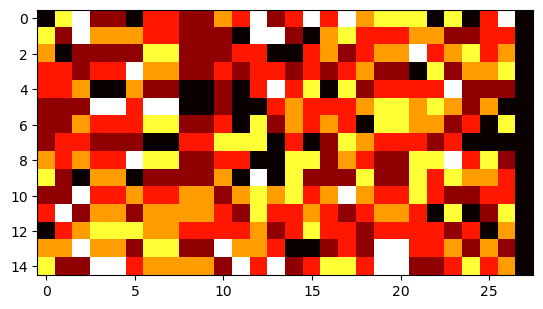

Power: 0, Scan Speed: 0
H_TOP: 0.0, H_BOT: 0.0
Power: 0, Scan Speed: 1
H_TOP: 0.0, H_BOT: 42.23421380310792
H: 0.0
Power: 0, Scan Speed: 2
H_TOP: 0.0, H_BOT: 59.72819795652019
H: 0.0
Power: 0, Scan Speed: 3
H_TOP: 0.0, H_BOT: 73.1518041247097
H: 0.0
Power: 0, Scan Speed: 4
H_TOP: 0.0, H_BOT: 84.46842760621584
H: 0.0
Power: 0, Scan Speed: 5
H_TOP: 0.0, H_BOT: 94.43857304000922
H: 0.0
Power: 0, Scan Speed: 6
H_TOP: 0.0, H_BOT: 103.45227350522457
H: 0.0
Power: 0, Scan Speed: 7
H_TOP: 0.0, H_BOT: 111.741226541355
H: 0.0
Power: 0, Scan Speed: 8
H_TOP: 0.0, H_BOT: 119.45639591304038
H: 0.0
Power: 0, Scan Speed: 9
H_TOP: 0.0, H_BOT: 126.70264140932375
H: 0.0
Power: 0, Scan Speed: 10
H_TOP: 0.0, H_BOT: 133.55631080434318
H: 0.0
Power: 0, Scan Speed: 11
H_TOP: 0.0, H_BOT: 140.07504050055792
H: 0.0
Power: 0, Scan Speed: 12
H_TOP: 0.0, H_BOT: 146.3036082494194
H: 0.0
Power: 0, Scan Speed: 13
H_TOP: 0.0, H_BOT: 152.27762344601456
H: 0.0
Power: 0, Scan Speed: 14
H_TOP: 0.0, H_BOT: 158.0259580509887

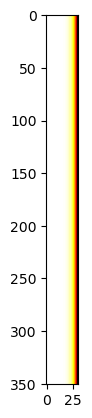

In [14]:
# q learning, table based

# state space: power, scan speed

# action space: power up, power down, power same, scan speed up, scan speed down, scan speed same

# reward function = -0.01*(H_star(power=i, scan_speed=j) - 150)**2 - 100*((scan_speed - 3)**4)

# power range 50 to 400 by 25. Minum value of 50, max value of 400

# scan speed range 0.3 to 3.0 by 0.1. Minum value of 0.3, max value of 3.0

# explore the state space and action space

# start with a random state, random action

# update the q table

# repeat the process

# until the q table converges

# use the q table to find the optimal power and scan speed values

# plot the optimal power and scan speed values

# plot the H_star values for the optimal power and scan speed values

# intruduce a chance to pick a random action instead of the optimal action

# max epochs = 1000

import numpy as np
import matplotlib.pyplot as plt

class QLearning:
    def __init__(self):

        self.absorptivity = 0.3
        self.rho = 2500.0
        self.Cp = 915.0
        self.T_solid = 853.0
        self.T_0 = 300.0
        self.hf = 40000.0
        self.Diffusivity = np.float64(0.000097)
        self.beam_diameter = np.float64(0.0001)
        self.alpha = 0.1
        self.gamma = 0.9
        self.epsilon = 0.1
        self.max_epochs = 1000
        self.power_min = 50
        self.power_max = 400
        self.power_step = 25
        self.scan_speed_min = 0.3
        self.scan_speed_max = 3.0
        self.scan_speed_step = 0.1
        

    def reward_function(self, power, scan_speed):
        H = self.H_star(power, scan_speed)
        return (-0.01*(H - 150)**2) - 100*((scan_speed - 3)**4)
    
    # def H_star(self, power, scan_speed):

    #     H_TOP = np.float64((4 * self.absorptivity * power)*100*0.9*0.3)
    #     H_BOT = np.float64((np.pi*self.rho*(self.Cp*(self.T_solid - self.T_0) + self.hf) * np.sqrt(self.Diffusivity * scan_speed * self.beam_diameter**3)))
    #     print(H_TOP, H_BOT)
    #     H = np.float64(H_TOP/H_BOT)
    #     return H

    def H_star(self, power, scan_speed):
        H_TOP = np.float64((4 * self.absorptivity * power) * 100 * 0.9 * 0.3)
        H_BOT = np.float64((np.pi * self.rho * (self.Cp * (self.T_solid - self.T_0) + self.hf) * 
                            np.sqrt(self.Diffusivity * scan_speed * self.beam_diameter**3)))
        
        print(f"Power: {power}, Scan Speed: {scan_speed}")
        print(f"H_TOP: {H_TOP}, H_BOT: {H_BOT}")
        
        if H_BOT == 0:
            print("Warning: Division by zero encountered")
            return np.inf  # or some large number to represent a very high H_star
        
        H = np.float64(H_TOP / H_BOT)
        print(f"H: {H}")
        return H
    
    def reward(self, power, scan_speed):
        H = self.reward_function(power, scan_speed)
        return (-0.01*(H - 150)**2) - 100*((scan_speed - 3)**4)
    
    def power_to_index(self, power):
        return int((power - self.power_min) / self.power_step)

    def scan_speed_to_index(self, scan_speed):

        SS = int((scan_speed - self.scan_speed_min) / self.scan_speed_step)
        
        if SS < 0.3:
            SS = 0.3
        return int(SS)

    def index_to_power(self, index):
        return self.power_min + index * self.power_step

    def index_to_scan_speed(self, index):
        return self.scan_speed_min + index * self.scan_speed_step

    def q_learning(self):
        power_size = int((self.power_max - self.power_min) / self.power_step) + 1
        scan_speed_size = int((self.scan_speed_max - self.scan_speed_min) / self.scan_speed_step) + 1
        q_table = np.zeros((power_size, scan_speed_size, 6))

        for epoch in range(self.max_epochs):
            # Corrected line for generating random power
            power = np.random.choice(np.arange(self.power_min, self.power_max + 1, self.power_step))
            scan_speed = np.random.uniform(self.scan_speed_min, self.scan_speed_max)
            
            power_idx = self.power_to_index(power)
            scan_speed_idx = self.scan_speed_to_index(scan_speed)

            if np.random.uniform(0, 1) < self.epsilon:
                action = np.random.randint(6)
            else:
                action = np.argmax(q_table[power_idx, scan_speed_idx])

            next_power, next_scan_speed = self.get_next_state(power, scan_speed, action)
            next_power_idx = self.power_to_index(next_power)
            next_scan_speed_idx = self.scan_speed_to_index(next_scan_speed)

            reward = self.reward(power, scan_speed)
            next_max_q = np.max(q_table[next_power_idx, next_scan_speed_idx])

            q_table[power_idx, scan_speed_idx, action] = (1 - self.alpha) * q_table[power_idx, scan_speed_idx, action] + \
                                                         self.alpha * (reward + self.gamma * next_max_q)

        return q_table
    
    def get_next_state(self, power, scan_speed, action):
        next_power, next_scan_speed = power, scan_speed
        if action == 0:
            next_power = power + 25
        elif action == 1:
            next_power = power - 25
        elif action == 2:
            next_power = power
        elif action == 3:
            next_scan_speed = scan_speed + 0.1
        elif action == 4:
            next_scan_speed = scan_speed - 0.1
        elif action == 5:
            next_scan_speed = scan_speed
        if next_power < 50:
            next_power = 50
        if next_power > 400:
            next_power = 400
        if next_scan_speed < 0.1:
            next_scan_speed = 0.1
        if next_scan_speed > 3.0:
            next_scan_speed = 3.0
        return next_power, next_scan_speed
    

    def get_optimal_action(self, power, scan_speed, q_table):
        power_idx = self.power_to_index(power)
        scan_speed_idx = self.scan_speed_to_index(scan_speed)
        return np.argmax(q_table[power_idx, scan_speed_idx])

    def get_optimal_policy(self, q_table):
        power_size = q_table.shape[0]
        scan_speed_size = q_table.shape[1]
        policy = np.zeros((power_size, scan_speed_size))
        for power_idx in range(power_size):
            for scan_speed_idx in range(scan_speed_size):
                power = self.index_to_power(power_idx)
                scan_speed = self.index_to_scan_speed(scan_speed_idx)
                policy[power_idx, scan_speed_idx] = self.get_optimal_action(power, scan_speed, q_table)
        return policy

    def main(self):
        q_table = self.q_learning()
        policy = self.get_optimal_policy(q_table)
        self.plot_optimal_policy(policy)
        self.plot_H_star(policy)
    
    def plot_optimal_policy(self, policy):
        plt.imshow(policy, cmap='hot', interpolation='nearest')
        plt.show()

    def plot_H_star(self, policy):
        H_star_values = np.zeros((351, 30))
        for power in range(351):
            for scan_speed in range(30):
                H_star_values[power, scan_speed] = self.reward(power, scan_speed)
        plt.imshow(H_star_values, cmap='hot', interpolation='nearest')
        plt.show()

    def main(self):
        q_table = self.q_learning()
        policy = self.get_optimal_policy(q_table)
        self.plot_optimal_policy(policy)
        self.plot_H_star(policy)


q_learning = QLearning()
q_learning.main()

